In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import KNNImputer


import warnings
warnings.filterwarnings('ignore')

### Reading main datasets 

Merging datasets from years in the span from 2016 to 2023.

In [2]:
data_frames = {}
for file in os.listdir('./datasets/'):
    year = str(file).split('_')[-2]
    path = os.path.join('datasets',file,file+'.csv')
    df = pd.read_csv(path, delimiter = ',', parse_dates=[0], na_values='0', header = None)
    data_frames['df_'+year] = df

In [3]:
df16, df17,df18,df19,df20,df21,df22 = data_frames['df_2016'], data_frames['df_2017'], data_frames['df_2018'], data_frames['df_2019'], data_frames['df_2020'], data_frames['df_2021'], data_frames['df_2022']
df_final = pd.concat([df16,df17,df18,df19,df20,df21,df22])

In [4]:
attributes = ['date', 'WindSpeedX', 'WindSpeedY','WindSpeedZ']
for i in range(4,54):
    attributes.append('fcp'+str(i))

df_final = df_final.set_axis(attributes, axis=1)
df_final["date"] = df_final["date"].apply(lambda x: x.replace(microsecond=0))
df_final.head(10)



,date,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,fcp7,fcp8,fcp9,...,fcp44,fcp45,fcp46,fcp47,fcp48,fcp49,fcp50,fcp51,fcp52,fcp53
0,2016-01-01 00:00:00,6.83609,-3.37934,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:01:00,6.76732,-3.30194,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:02:00,6.39107,-2.61173,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:03:00,6.44897,-2.61525,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:04:00,6.58758,-2.73082,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01 00:05:00,6.44875,-2.68868,-13.3076,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01 00:06:00,6.38849,-2.61678,-13.3695,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01 00:07:00,6.28842,-2.54100,-13.4081,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01 00:08:00,6.32911,-2.58715,-13.3603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01 00:09:00,6.33381,-2.67437,-13.3147,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Readings from earth magnetometers

The following data comes from magnetometers' readings all over the earth. The porpose of this set of data is to provide the kp and ap index values, in order to train and validate our model.

In [5]:
ind = pd.read_csv('./kpg.txt', delimiter=' ')
ind_filter = ind[(ind['YYYY']>=2016)&(ind['YYYY']<=2022)]
ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)
ind_filter.drop(columns=["hh._m","days","days_m"], inplace=True)
ind_filter.head()

,YYYY,MM,DD,h,Kp,ap,D
245448,2016,1,1,0.0,6.000,80,1
245449,2016,1,1,3.0,5.333,56,1
245450,2016,1,1,6.0,5.000,48,1
245451,2016,1,1,9.0,3.333,18,1
245452,2016,1,1,12.0,1.667,6,1


## Checking nulls 

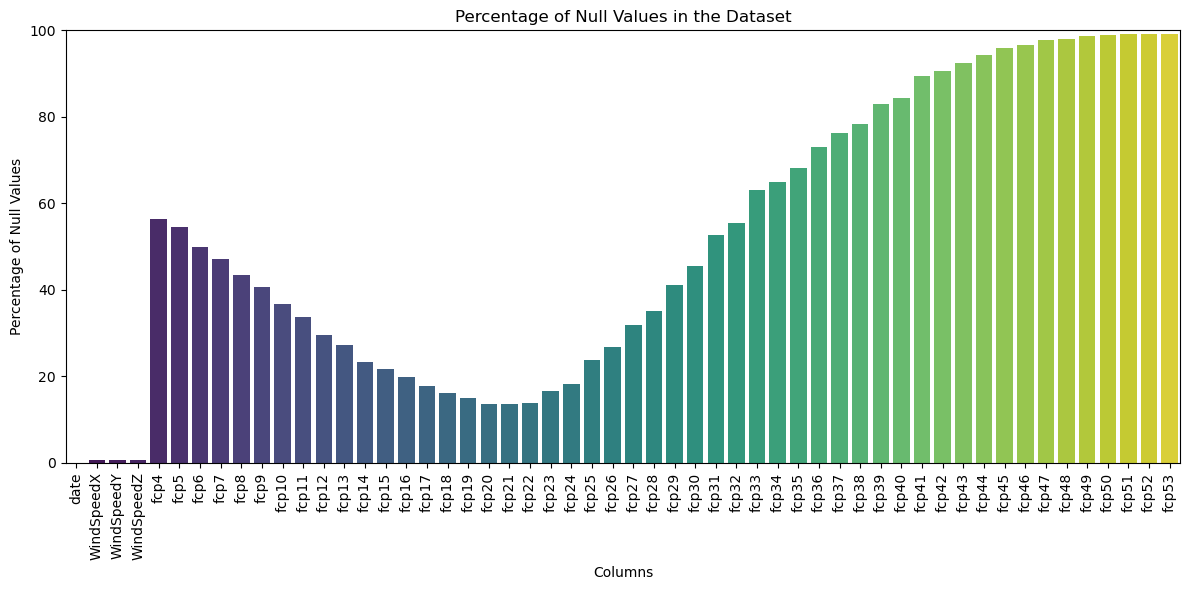

In [6]:
def plotNulls(df_final):
    null_percentage = (df_final.isnull().sum() / len(df_final)) * 100

    # Create a bar plot of null value percentages
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Null Values")
    plt.title("Percentage of Null Values in the Dataset")

    # Set the y-axis scale from 0 to 100
    plt.ylim(0, 100)

    plt.tight_layout()

    # Show the plot
    plt.show()
plotNulls(df_final)

In [7]:
for k in data_frames:
    num_nulls = data_frames[k].isnull().sum().sum()
    print(k,'has a total of',num_nulls/data_frames[k].shape[0],'% (',num_nulls,') nulls')

df_2016 has a total of 30.86239777213762 % ( 8755045 ) nulls
df_2017 has a total of 30.70994101978691 % ( 16141145 ) nulls
df_2018 has a total of 31.242830280011916 % ( 16781149 ) nulls
df_2019 has a total of 31.24171738451935 % ( 8007877 ) nulls
df_2020 has a total of 28.850437656305825 % ( 12920380 ) nulls
df_2021 has a total of 23.672530441400305 % ( 12442282 ) nulls
df_2022 has a total of 20.29900494672755 % ( 10669157 ) nulls
df_2023 has a total of 21.038439207650274 % ( 3696033 ) nulls


## Merging dataframes

Now we will be merging the earth's readings of KP and AP indexes with the readings from DSCOVR, in order to build the final version of the data set for the posterior training.

In [8]:
def truncateHour(x):
    if x< 3:
        return 0
    elif x< 6:
        return 3
    elif x < 9:
        return 6
    elif x< 12:
        return 9
    elif x< 15:
        return 12
    elif x< 18:
        return 15
    elif x< 21:
        return 18
    else:
        return 21

In [9]:
df_final['YYYY'] = df_final['date'].dt.year
df_final['MM'] = df_final['date'].dt.month
df_final['DD'] = df_final['date'].dt.day
df_final['h'] = df_final['date'].dt.hour
df_final['h'] = df_final['h'].apply(truncateHour)

In [10]:
df_final.head(180)

,date,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,fcp7,fcp8,fcp9,...,fcp48,fcp49,fcp50,fcp51,fcp52,fcp53,YYYY,MM,DD,h
0,2016-01-01 00:00:00,6.83609,-3.379340,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
1,2016-01-01 00:01:00,6.76732,-3.301940,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
2,2016-01-01 00:02:00,6.39107,-2.611730,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
3,2016-01-01 00:03:00,6.44897,-2.615250,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
4,2016-01-01 00:04:00,6.58758,-2.730820,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2016-01-01 02:55:00,2.80987,0.072707,-13.1230,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
176,2016-01-01 02:56:00,2.90330,0.176012,-13.0506,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
177,2016-01-01 02:57:00,2.96329,0.333369,-13.1096,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
178,2016-01-01 02:58:00,2.83112,0.078324,-13.1435,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0


In [11]:
df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()

In [12]:
df_grouped

date  WindSpeedX  WindSpeedY  WindSpeedZ  \
YYYY MM DD h                                                            
2016 1  1  0  2016-01-01 01:29:30    4.433160   -1.247880  -13.165854   
           3  2016-01-01 04:29:30    3.448769   -3.864323   -8.984068   
           6  2016-01-01 07:29:30    4.407694   -5.729229   -6.420560   
           9  2016-01-01 10:29:30    3.758710   -6.973925    3.080465   
           12 2016-01-01 13:29:30    6.514989   -6.250111   -0.786576   
...                           ...         ...         ...         ...   
2022 12 31 9  2022-12-31 10:29:30   -4.575782    1.086207    2.755094   
           12 2022-12-31 13:29:30   -2.912565    0.545443   -1.746772   
           15 2022-12-31 16:29:30   -3.569145    2.629413    0.167908   
           18 2022-12-31 19:29:30   -4.063840    1.834405   -1.244176   
           21 2022-12-31 22:29:30   -4.004869    1.863977   -0.416700   

                     fcp4        fcp5        fcp6        fcp7        fcp8  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   139.338250  108.341150  131.678031  127.960636  124.528562   
           6   143.819967  103.094027  126.340200  129.495920  124.643217   
           9          NaN         NaN         NaN         NaN         NaN   
           12  142.064460  102.750320  127.700920  130.539498  124.235998   
...                   ...         ...         ...         ...         ...   
2022 12 31 9    20.038541    0.253126    2.232621   10.446358   12.015030   
           12   25.665688    0.231726    0.301693    7.798967   15.294495   
           15   32.373597    0.231726    0.533728   11.987406   18.079204   
           18   24.981998    0.231726    0.869348   12.322342   12.377256   
           21   24.341184    0.231726    0.497367    3.097159    9.419372   

                     fcp9  ...       fcp44       fcp45       fcp46  \
YYYY MM DD h               ...                                       
2016 1  1  0          NaN  ...         NaN         NaN         NaN   
           3   108.572063  ...  161.363000  134.080562  151.425344   
           6    96.828230  ...  163.193200  131.601167  151.214300   
           9          NaN  ...         NaN         NaN         NaN   
           12   73.482044  ...  162.297380  133.708920  152.504700   
...                   ...  ...         ...         ...         ...   
2022 12 31 9     1.288711  ...         NaN         NaN         NaN   
           12    0.234433  ...  372.433667  295.602368  362.085000   
           15    0.313125  ...  351.656905  288.231412  386.202500   
           18    0.253563  ...  316.262016  291.814545  388.993750   
           21    0.248380  ...  339.274714  277.562000         NaN   

                    fcp47       fcp48       fcp49       fcp50       fcp51  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   140.448156  132.193750  151.046906  151.407406  134.467309   
           6   144.231933  129.541733  147.492067  156.671133  137.356233   
           9          NaN         NaN         NaN         NaN         NaN   
           12  142.948180  129.320420  148.748020  156.235200  136.425440   
...                   ...         ...         ...         ...         ...   
2022 12 31 9          NaN         NaN         NaN         NaN         NaN   
           12         NaN         NaN         NaN         NaN         NaN   
           15         NaN         NaN         NaN         NaN         NaN   
           18         NaN         NaN         NaN         NaN         NaN   
           21         NaN         NaN         NaN         NaN         NaN   

                    fcp52       fcp53  
YYYY MM DD h                           
2016 1  1  0          NaN         NaN  
           3   162.754562  142.775667  
    

In [13]:
merged_df = pd.merge(df_grouped, ind_filter, on=['YYYY', 'DD', 'MM', 'h'], how='inner')
merged_df.head()

,YYYY,DD,MM,h,date,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,...,fcp47,fcp48,fcp49,fcp50,fcp51,fcp52,fcp53,Kp,ap,D
0,2016,1,1,0,2016-01-01 01:29:30,4.433160,-1.247880,-13.165854,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,80,1
1,2016,1,1,3,2016-01-01 04:29:30,3.448769,-3.864323,-8.984068,139.338250,108.341150,...,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.333,56,1
2,2016,1,1,6,2016-01-01 07:29:30,4.407694,-5.729229,-6.420560,143.819967,103.094027,...,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.000,48,1
3,2016,1,1,9,2016-01-01 10:29:30,3.758710,-6.973925,3.080465,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18,1
4,2016,1,1,12,2016-01-01 13:29:30,6.514989,-6.250111,-0.786576,142.064460,102.750320,...,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.667,6,1


In [14]:
merged_df

,YYYY,DD,MM,h,date,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,...,fcp47,fcp48,fcp49,fcp50,fcp51,fcp52,fcp53,Kp,ap,D
0,2016,1,1,0,2016-01-01 01:29:30,4.433160,-1.247880,-13.165854,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,80,1
1,2016,1,1,3,2016-01-01 04:29:30,3.448769,-3.864323,-8.984068,139.338250,108.341150,...,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.333,56,1
2,2016,1,1,6,2016-01-01 07:29:30,4.407694,-5.729229,-6.420560,143.819967,103.094027,...,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.000,48,1
3,2016,1,1,9,2016-01-01 10:29:30,3.758710,-6.973925,3.080465,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18,1
4,2016,1,1,12,2016-01-01 13:29:30,6.514989,-6.250111,-0.786576,142.064460,102.750320,...,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.667,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,2022,31,12,9,2022-12-31 10:29:30,-4.575782,1.086207,2.755094,20.038541,0.253126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.667,6,2
17164,2022,31,12,12,2022-12-31 13:29:30,-2.912565,0.545443,-1.746772,25.665688,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,15,2
17165,2022,31,12,15,2022-12-31 16:29:30,-3.569145,2.629413,0.167908,32.373597,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.667,12,2
17166,2022,31,12,18,2022-12-31 19:29:30,-4.063840,1.834405,-1.244176,24.981998,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18,2


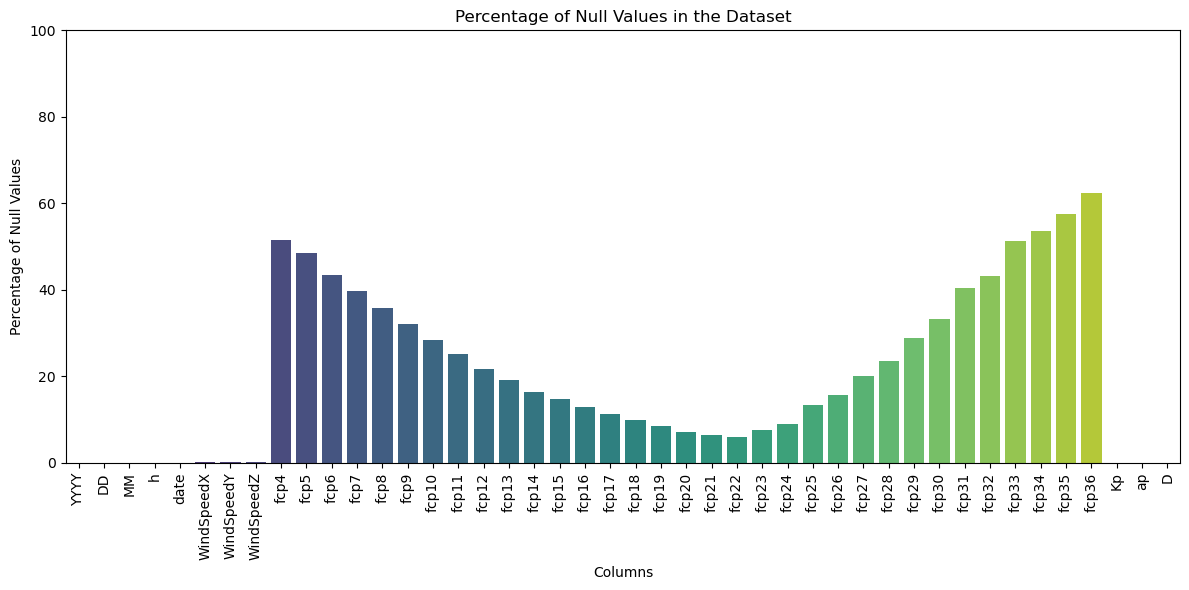

In [15]:
# find the columns with higher than a 65% of nulls
total = len(merged_df.loc[:,"YYYY"])
for col in merged_df.columns:
    ratio = merged_df[col].isnull().sum()/total # ratio of nulls
    if(ratio>0.65):
        merged_df.drop(columns=col, axis=1, inplace=True)
plotNulls(merged_df)

#### Enhanced dataset, KNN imputation

In [16]:
filtered_df = merged_df.drop(columns="date", axis=1)      # dropping datetime type
filtered_df

,YYYY,DD,MM,h,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,...,fcp30,fcp31,fcp32,fcp33,fcp34,fcp35,fcp36,Kp,ap,D
0,2016,1,1,0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,80,1
1,2016,1,1,3,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,...,156.115273,157.808188,151.744812,155.335281,159.891094,156.531719,165.816281,5.333,56,1
2,2016,1,1,6,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,...,155.001633,154.731300,146.782767,152.727733,159.018433,153.443367,162.591600,5.000,48,1
3,2016,1,1,9,3.758710,-6.973925,3.080465,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18,1
4,2016,1,1,12,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,...,151.837784,149.355490,147.432392,154.934608,155.693529,150.167540,163.003080,1.667,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,2022,31,12,9,-4.575782,1.086207,2.755094,20.038541,0.253126,2.232621,...,529.563333,472.956029,399.622345,399.180018,384.143088,304.217281,290.804663,1.667,6,2
17164,2022,31,12,12,-2.912565,0.545443,-1.746772,25.665688,0.231726,0.301693,...,547.693349,528.326360,469.098238,476.758134,493.740244,418.826238,366.365000,3.000,15,2
17165,2022,31,12,15,-3.569145,2.629413,0.167908,32.373597,0.231726,0.533728,...,548.032500,544.346783,498.597672,501.492822,497.484672,409.335411,374.190844,2.667,12,2
17166,2022,31,12,18,-4.063840,1.834405,-1.244176,24.981998,0.231726,0.869348,...,541.046728,523.030100,478.009411,494.701889,489.798272,403.101650,384.423983,3.333,18,2


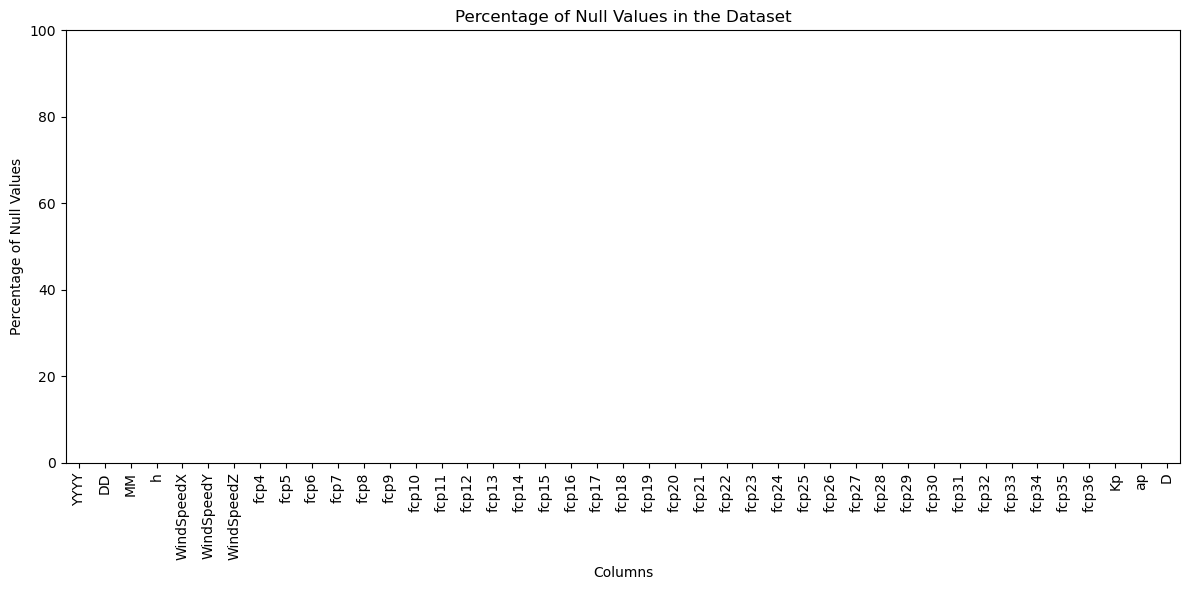

In [17]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
postImputation = imputer.fit_transform(filtered_df)
columnNames=filtered_df.columns.tolist()
enhanced_df = pd.DataFrame(postImputation, columns = columnNames)
plotNulls(enhanced_df)

#### Dimensionality reduction using PCA
The porpouse of this section is to reduce dimensionality using PCA.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
data_columns = enhanced_df.columns[4:]
enhanced_standarized = enhanced_df.copy()
enhanced_standarized[data_columns] = StandardScaler().fit_transform(enhanced_df[data_columns])
enhanced_standarized

,YYYY,DD,MM,h,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,...,fcp30,fcp31,fcp32,fcp33,fcp34,fcp35,fcp36,Kp,ap,D
0,2016.0,1.0,1.0,0.0,1.487544,-0.358769,-6.389393,-0.476829,-0.554086,-0.606075,...,1.077374,0.957298,0.790335,0.784675,0.577525,0.068930,0.341425,3.579217,7.013861,-0.861326
1,2016.0,1.0,1.0,3.0,1.152341,-1.184339,-4.363532,0.521373,1.186619,0.033561,...,-4.240318,-3.828672,-3.187540,-3.298352,-3.334668,-2.949290,-3.663288,3.035520,4.670888,-0.861326
2,2016.0,1.0,1.0,6.0,1.478873,-1.772776,-3.121644,0.591493,1.090187,-0.034890,...,-4.257300,-3.872706,-3.249645,-3.330579,-3.345409,-2.983926,-3.703772,2.764079,3.889897,-0.861326
3,2016.0,1.0,1.0,9.0,1.257882,-2.165516,1.481117,-1.075070,-0.772687,-0.569486,...,1.350524,1.381915,0.973308,0.747975,0.650860,0.217244,-0.115649,1.405243,0.961181,-0.861326
4,2016.0,1.0,1.0,12.0,2.196445,-1.937130,-0.392266,0.564027,1.083871,-0.017440,...,-4.305545,-3.949640,-3.241514,-3.303304,-3.386334,-3.020665,-3.698606,0.047223,-0.210305,-0.861326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,2022.0,31.0,12.0,9.0,-1.580164,0.377709,1.323491,-1.345143,-0.799819,-1.626395,...,1.454276,0.681459,-0.085111,-0.284652,-0.574408,-1.292987,-2.094099,0.047223,-0.210305,1.161000
17164,2022.0,31.0,12.0,12.0,-1.013809,0.207081,-0.857433,-1.257103,-0.800213,-1.651156,...,1.730735,1.473873,0.784447,0.674143,0.774595,-0.007640,-1.145464,1.133802,0.668310,1.161000
17165,2022.0,31.0,12.0,15.0,-1.237386,0.864639,0.070132,-1.152153,-0.800213,-1.648181,...,1.735907,1.703143,1.153661,0.979841,0.820685,-0.114080,-1.047213,0.862361,0.375438,1.161000
17166,2022.0,31.0,12.0,18.0,-1.405839,0.613789,-0.613951,-1.267799,-0.800213,-1.643877,...,1.629383,1.398077,0.895979,0.895911,0.726075,-0.183992,-0.918739,1.405243,0.961181,1.161000


In [20]:
pca_columns = list(enhanced_df.columns)
pca_columns = pca_columns[7:-3]
print(pca_columns)

['fcp4', 'fcp5', 'fcp6', 'fcp7', 'fcp8', 'fcp9', 'fcp10', 'fcp11', 'fcp12', 'fcp13', 'fcp14', 'fcp15', 'fcp16', 'fcp17', 'fcp18', 'fcp19', 'fcp20', 'fcp21', 'fcp22', 'fcp23', 'fcp24', 'fcp25', 'fcp26', 'fcp27', 'fcp28', 'fcp29', 'fcp30', 'fcp31', 'fcp32', 'fcp33', 'fcp34', 'fcp35', 'fcp36']


In [21]:
pca_df = enhanced_standarized[pca_columns]

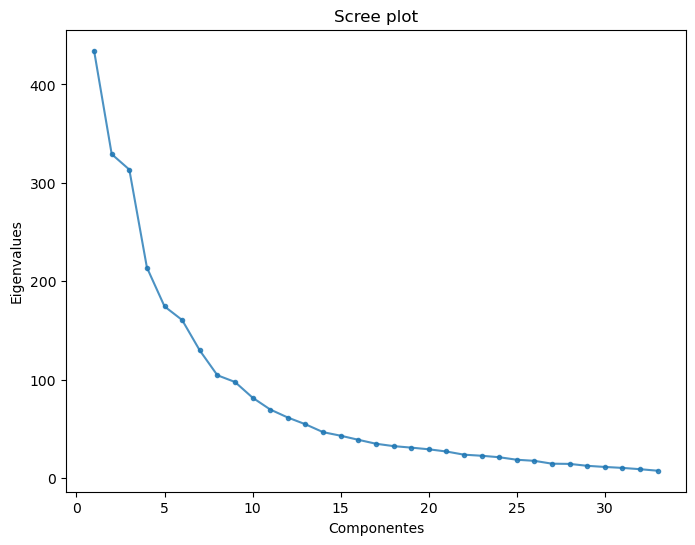

In [22]:
myPCA = PCA().fit(pca_df);
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

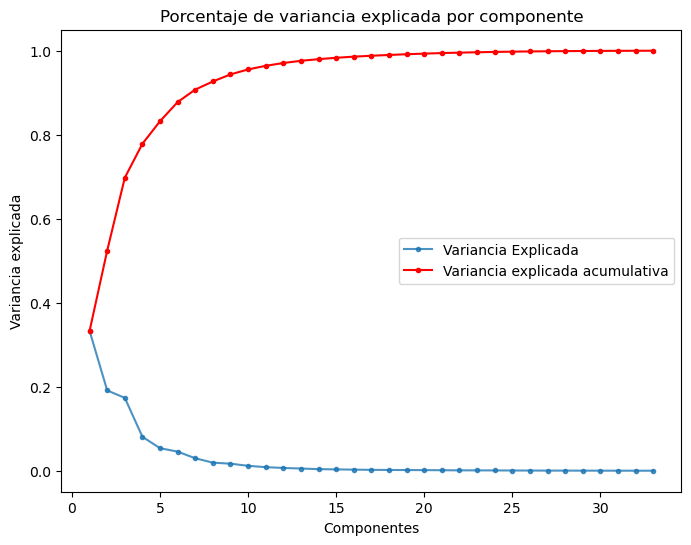

In [23]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

In [24]:
pca = PCA(n_components=10)

# Aplica el PCA al DataFrame estandarizado
pca_result = pca.fit_transform(pca_df)

# Imprime el DataFrame PCA
print(pca_result)

[[-1.09926963  3.71848284  1.89843315 ... -0.18171698 -0.05748201
   0.38250574]
 [-7.8686366  -8.49793573 -5.53623221 ...  1.16484547 -0.29509828
   0.786885  ]
 [-8.08083045 -8.67482658 -5.34413819 ...  1.17436897 -0.32811178
   0.94661913]
 ...
 [-4.05107679  0.90385849 -4.82721103 ...  0.27198225  0.57168251
   0.99816969]
 [-4.33405727  0.71289595 -4.77884675 ...  0.16743356  0.49943595
   0.82904876]
 [-4.70234091  1.28390316 -4.76878    ...  0.60684514  0.66449741
   0.89847128]]


In [25]:
pca_result_df = pd.DataFrame(pca_result)
pca_result_df

,0,1,2,3,4,5,6,7,8,9
0,-1.099270,3.718483,1.898433,2.688886,-1.141178,0.317791,-0.362647,-0.181717,-0.057482,0.382506
1,-7.868637,-8.497936,-5.536232,-9.045643,-1.484288,-0.978699,-1.110861,1.164845,-0.295098,0.786885
2,-8.080830,-8.674827,-5.344138,-8.950286,-1.716760,-1.389697,-1.042313,1.174369,-0.328112,0.946619
3,-0.964132,3.136610,-0.033688,2.741567,-0.727445,0.427675,0.392949,0.238968,0.044602,0.379197
4,-8.129296,-8.850949,-5.095417,-8.752581,-1.517385,-1.875653,-1.010415,1.120776,-0.484966,1.054521
...,...,...,...,...,...,...,...,...,...,...
17163,-5.386951,2.859372,-3.877833,0.978100,0.622667,-1.009187,0.416266,1.080776,0.002682,0.147540
17164,-4.155159,1.274746,-4.612344,2.370245,-1.000677,-0.762497,-0.787993,0.436077,0.377010,0.730019
17165,-4.051077,0.903858,-4.827211,2.380977,-1.454062,-0.611981,-1.020211,0.271982,0.571683,0.998170
17166,-4.334057,0.712896,-4.778847,2.164919,-1.503197,-0.511497,-1.117219,0.167434,0.499436,0.829049


In [26]:
listColumns = enhanced_standarized.columns.tolist()[7:]
enhanced_final = enhanced_standarized.drop(columns=listColumns, axis=1)


In [27]:
pca_result_cols = pca_result_df.columns.tolist()
enhanced_final[pca_result_cols]=pca_result_df
enhanced_final


,YYYY,DD,MM,h,WindSpeedX,WindSpeedY,WindSpeedZ,0,1,2,3,4,5,6,7,8,9
0,2016.0,1.0,1.0,0.0,1.487544,-0.358769,-6.389393,-1.099270,3.718483,1.898433,2.688886,-1.141178,0.317791,-0.362647,-0.181717,-0.057482,0.382506
1,2016.0,1.0,1.0,3.0,1.152341,-1.184339,-4.363532,-7.868637,-8.497936,-5.536232,-9.045643,-1.484288,-0.978699,-1.110861,1.164845,-0.295098,0.786885
2,2016.0,1.0,1.0,6.0,1.478873,-1.772776,-3.121644,-8.080830,-8.674827,-5.344138,-8.950286,-1.716760,-1.389697,-1.042313,1.174369,-0.328112,0.946619
3,2016.0,1.0,1.0,9.0,1.257882,-2.165516,1.481117,-0.964132,3.136610,-0.033688,2.741567,-0.727445,0.427675,0.392949,0.238968,0.044602,0.379197
4,2016.0,1.0,1.0,12.0,2.196445,-1.937130,-0.392266,-8.129296,-8.850949,-5.095417,-8.752581,-1.517385,-1.875653,-1.010415,1.120776,-0.484966,1.054521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,2022.0,31.0,12.0,9.0,-1.580164,0.377709,1.323491,-5.386951,2.859372,-3.877833,0.978100,0.622667,-1.009187,0.416266,1.080776,0.002682,0.147540
17164,2022.0,31.0,12.0,12.0,-1.013809,0.207081,-0.857433,-4.155159,1.274746,-4.612344,2.370245,-1.000677,-0.762497,-0.787993,0.436077,0.377010,0.730019
17165,2022.0,31.0,12.0,15.0,-1.237386,0.864639,0.070132,-4.051077,0.903858,-4.827211,2.380977,-1.454062,-0.611981,-1.020211,0.271982,0.571683,0.998170
17166,2022.0,31.0,12.0,18.0,-1.405839,0.613789,-0.613951,-4.334057,0.712896,-4.778847,2.164919,-1.503197,-0.511497,-1.117219,0.167434,0.499436,0.829049
